# What is Time Series

Time series is a **sequence** of data in successive order of time. The value of data when combined with time ofen become more useful. We can gain more information by doing timeseries analysis, wich often resulting in forecasting. Let's take a look in a most common time series data, stock data.

In [18]:
from pandas_datareader import data
import pandas as pd

In [19]:
symbol = ['AAPL', 'BBCA.JK']
source = 'yahoo'
start_date = '2012-01-01'
end_date = '2020-01-20'
stock = data.DataReader(symbol, source, start_date, end_date)
# stock = pd.read_pickle('stock')


In [20]:
apple = stock.xs('AAPL', level='Symbols', axis=1)
apple

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,51.115936,58.747143,58.928570,58.428570,58.485714,75555200.0
2012-01-04,51.390648,59.062859,59.240002,58.468571,58.571430,65005500.0
2012-01-05,51.961189,59.718571,59.792858,58.952858,59.278572,67817400.0
2012-01-06,52.504375,60.342857,60.392857,59.888573,59.967144,79573200.0
...,...,...,...,...,...,...
2020-01-14,312.679993,312.679993,317.570007,312.170013,316.700012,40488600.0
2020-01-15,311.339996,311.339996,315.500000,309.549988,311.850006,30480900.0
2020-01-16,315.239990,315.239990,315.700012,312.089996,313.589996,27207300.0


In [21]:
apple = apple.resample('D').mean().fillna(method='ffill').fillna(method='bfill')

In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
# import matplotlib
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

In [23]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

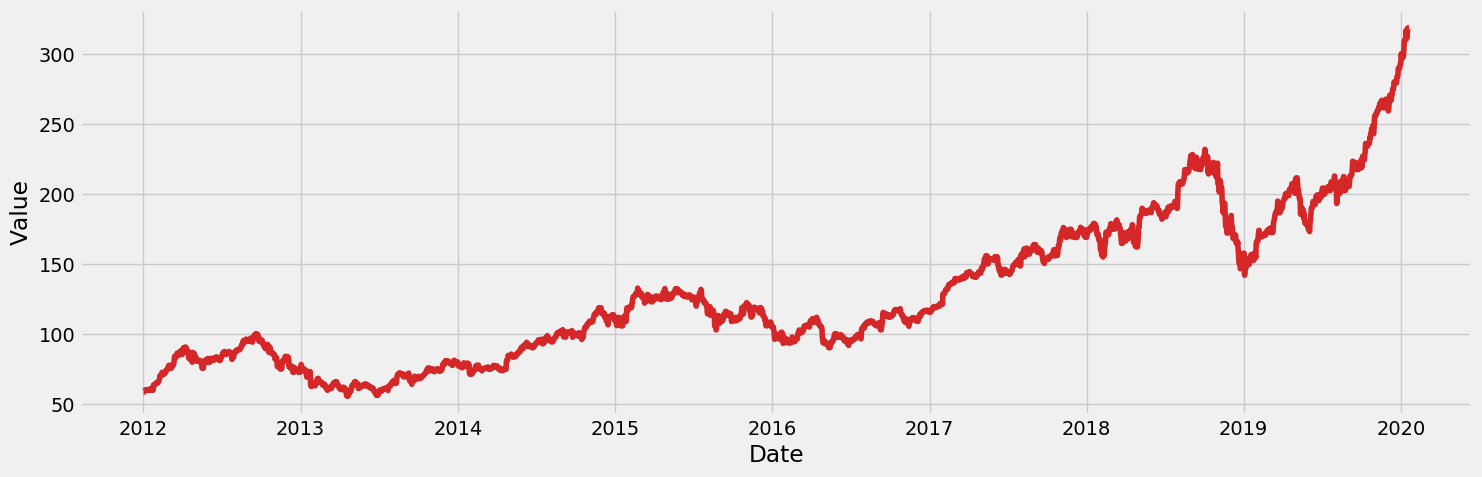

In [24]:
plot_df(apple, apple.index, apple['Close'])

# Time series Components

There are three components of time-series data: 
- Trend: the movement of the data on a larger scale (moving average)
- Seasonality: repeated seasonal fluctuations
- Residual: any fluctuations not captured from trend or seasonality (should be random)

A time series can be modeled as **additive** or **multiplicative** time series depending on its nature of trend and seasonality. \
**Aditive Time Series** \
observed = Trend + Seasonal + Residual \
**Multiplicative Time Series** \
observed = Trend $\times$ Seasonal $\times$ Residual

*Source: Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. OTexts.com/fpp2. Accessed on January 22, 2020.*

So, how we diffrentiate additive and multiplicative time series, please take a look an example image below ([source](https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/))
![](res/add_vs_multi.png)

Based on our data values, if the magnitude of seasonality changes overtime (see image on the right), then the data is multiplicative. 

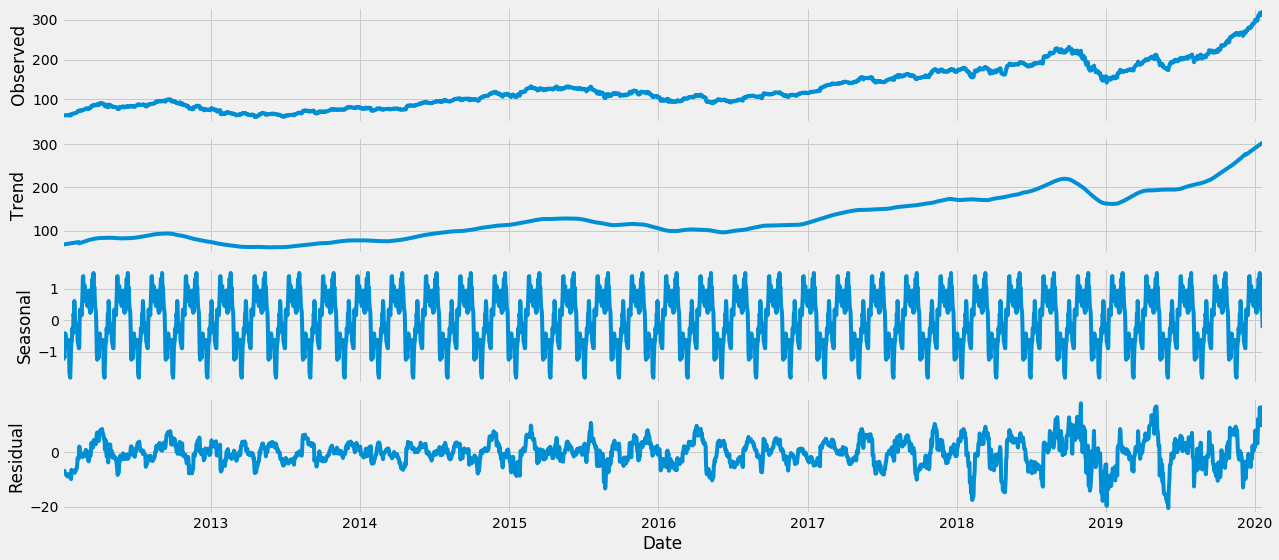

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(apple['Close'], model='additive', freq=7*4*3,extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

The `extrapolate_trend='freq'` will make the length of residual, trend, and seasonal the same by taking care of any missing values at the beginning of the series. 

Now that we already decompose the data, let's try to reconstruct and see whether the formula are correct or not. 

In [26]:
apple_rc = pd.concat([decomposition.seasonal, decomposition.resid, decomposition.trend, decomposition.observed], axis=1)
apple_rc.columns = ['seasonal', 'residual', 'trend', 'observation']
apple_rc['total'] = apple_rc['seasonal'] + apple_rc['residual'] + apple_rc['trend']
apple_rc

,seasonal,residual,trend,observation,total
Date,,,,,
2012-01-02,-0.255056,-8.553381,67.555580,58.747143,58.747143
2012-01-03,-1.045363,-7.913242,67.705748,58.747143,58.747143
2012-01-04,-1.261384,-7.531672,67.855915,59.062859,59.062859
2012-01-05,-0.976904,-7.310608,68.006082,59.718571,59.718571
2012-01-06,-1.051264,-6.762128,68.156250,60.342857,60.342857
...,...,...,...,...,...
2020-01-16,0.727528,13.379360,301.133102,315.239990,315.239990
2020-01-17,0.423105,16.490818,301.816088,318.730011,318.730011
2020-01-18,0.335488,15.895449,302.499074,318.730011,318.730011


In [27]:
(apple_rc['total'] == apple_rc['observation']).mean()

1.0

From code above, we have a proof that the formula is true. 

# Stationary

Stationary time-series is time series data that the values don't follow a function of time. 

The difference bwetween stationary time-series and non stationary can be obvious in these example ([source](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322))
![](res/stationary.png)



By the example above, we can conclude that variance in stationary time-series will likely to be constant for each window. Why we need stationary time-series? it's because stationary time-series is easier to be analyzed and most of forecasting algorithm works well with stationary time-series.

## Change into stationary time-series

There are some ways to make a series into stationary: 
- Differencing the Series
- Transform the series to its log 
- Transform the series to its root 
- Other combination

since our data is additive, let's try to difference it using `.diff` method.

In [67]:
apple_st = apple.diff(1)
apple_st.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-02,nan,nan,nan,nan,nan,nan
2012-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-04,0.27471160888671875,0.3157157897949219,0.311431884765625,0.04000091552734375,0.08571624755859375,"-10,549,700.0"
2012-01-05,0.5705413818359375,0.6557121276855469,0.5528564453125,0.4842872619628906,0.7071418762207031,"2,811,900.0"
2012-01-06,0.5431861877441406,0.6242866516113281,0.5999984741210938,0.9357147216796875,0.6885719299316406,"11,755,800.0"


If we see, the first data values will be missing since there are no data beforehead. Let's assume that it's the first data, so the difference between the previous one is zero using fillna(0))

In [68]:
apple_st = apple_st.fillna(0)
apple_st.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-04,0.27471160888671875,0.3157157897949219,0.311431884765625,0.04000091552734375,0.08571624755859375,"-10,549,700.0"
2012-01-05,0.5705413818359375,0.6557121276855469,0.5528564453125,0.4842872619628906,0.7071418762207031,"2,811,900.0"
2012-01-06,0.5431861877441406,0.6242866516113281,0.5999984741210938,0.9357147216796875,0.6885719299316406,"11,755,800.0"


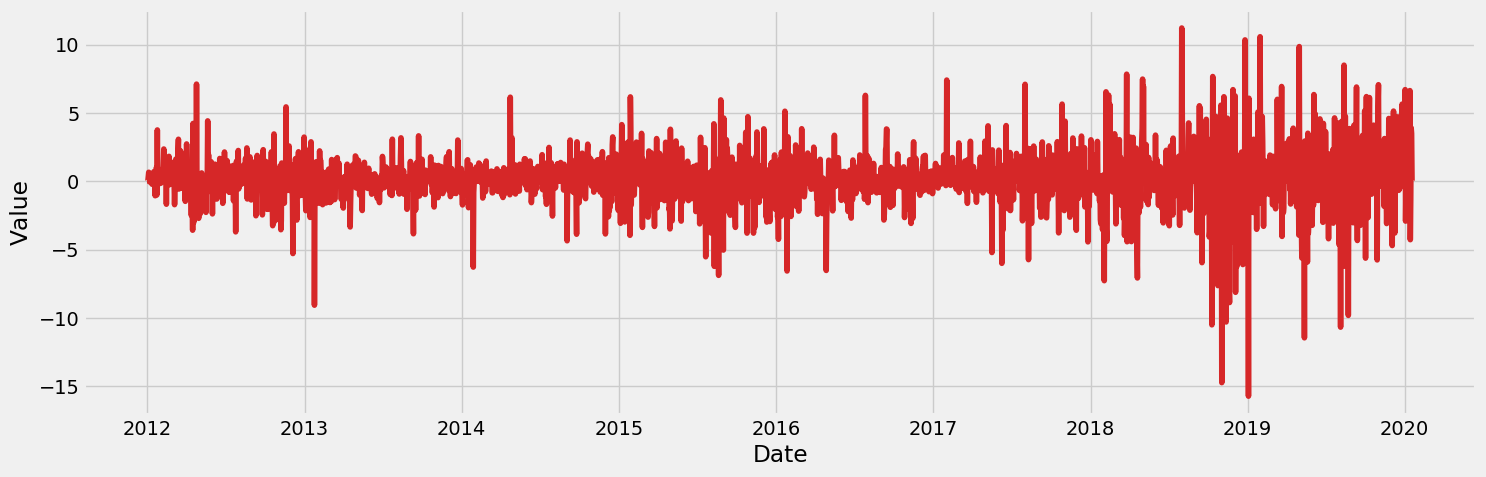

In [69]:
plot_df(apple_st, apple_st.index, apple_st['Close'])

Based on the chart, our transformed data seems more stationary. But is it? If you're a bit skeptical about the result, there exists several measurement to test data stationarity: 
- Augmented Dicky Fuller (ADF) test
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

Let's try using ADF, the most common way to test stationarity. 

In [70]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(apple_st['Close'])
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")



ADF Value : -7.930792441536947
P Value : 3.517685147152115e-12



When you run the ADF test, the result should be negative value, and the P-value should beneath certain threshold. For example, we will use p-value < 5%. Based on the result, the ADF Value is -7 wich means our data is stationary enough. with confidental value (p-value) < 5%, it means that our data is statistically stationary. 

But, doing transformation means we changed the data. Yes, **we changed the data**. But don't worry, we can still try to reconstruct it into original form. However, it depends on how you changed the data. Since we are using diff wich resuling in the differences between current data and previous one, a cumulative sum (`cumsum`)will work as a cure. 

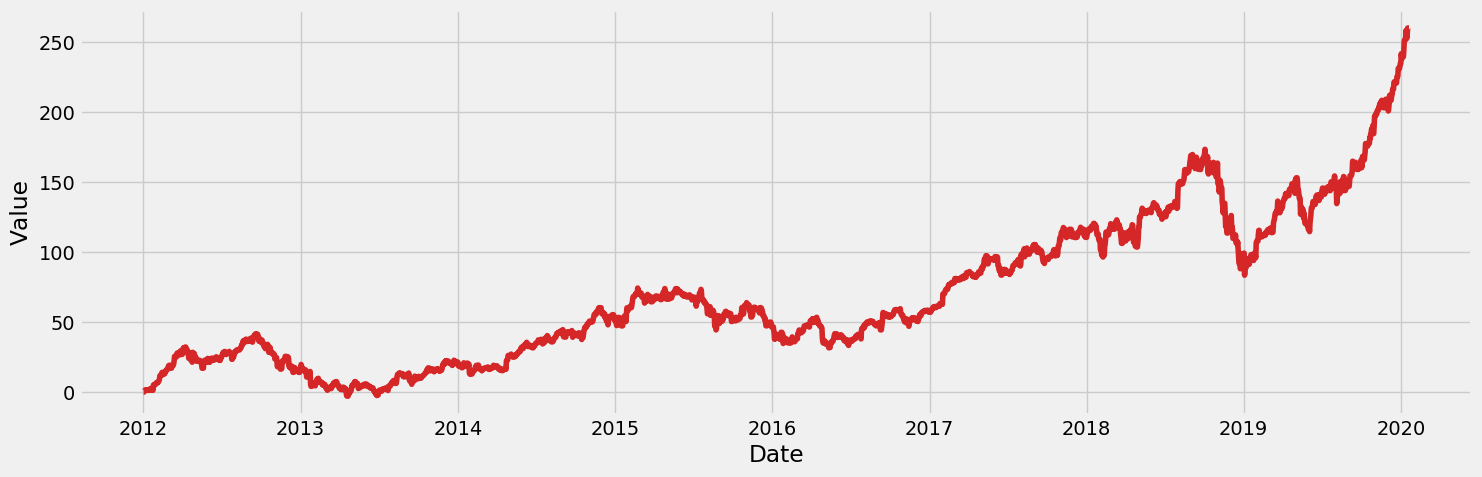

In [71]:
plot_df(apple_st, apple_st.index, apple_st.cumsum()['Close'])

In [65]:
# the first missing value of the data to be original value 
apple_st.iloc[0,:] = apple.iloc[0,:]

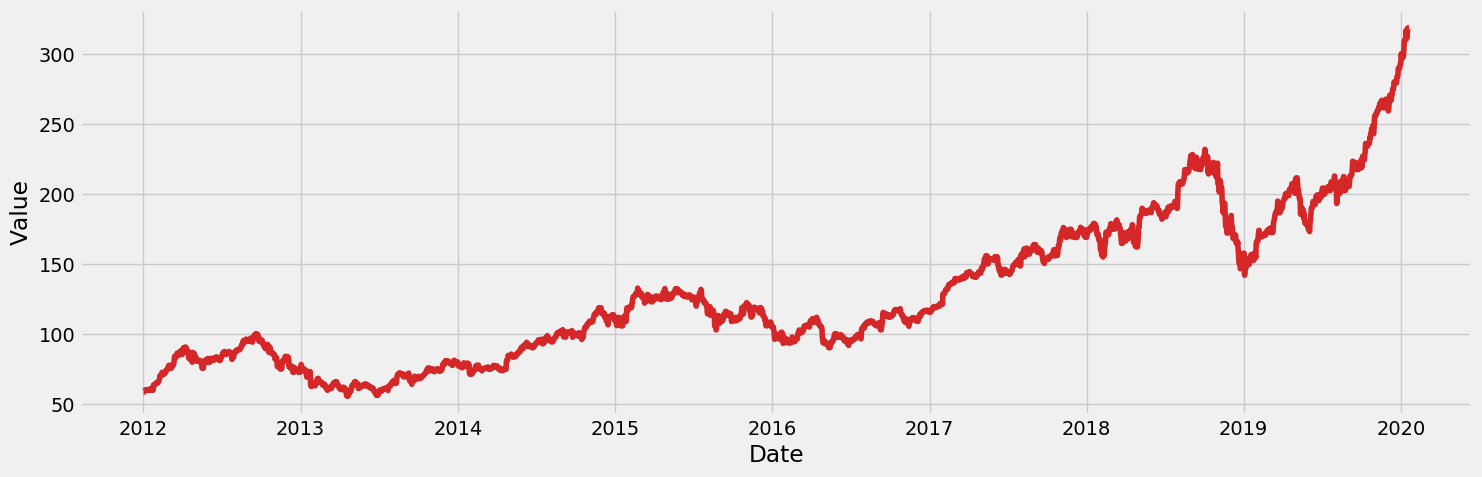

In [66]:
plot_df(apple_st, apple_st.index, apple_st.cumsum()['Close'])

## Modelling

## Model Evaluation

In [52]:
pd.options.display.float_format = '{:,}'.format

In [54]:
apple*1000

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-02,"51,115.936279296875","58,747.14279174805","58,928.56979370117","58,428.56979370117","58,485.713958740234","75,555,200,000.0"
2012-01-03,"51,115.936279296875","58,747.14279174805","58,928.56979370117","58,428.56979370117","58,485.713958740234","75,555,200,000.0"
2012-01-04,"51,390.647888183594","59,062.85858154297","59,240.0016784668","58,468.570709228516","58,571.43020629883","65,005,500,000.0"
2012-01-05,"51,961.18927001953","59,718.570709228516","59,792.8581237793","58,952.857971191406","59,278.57208251953","67,817,400,000.0"
2012-01-06,"52,504.37545776367","60,342.857360839844","60,392.85659790039","59,888.572692871094","59,967.14401245117","79,573,200,000.0"
...,...,...,...,...,...,...
2020-01-16,"315,239.990234375","315,239.990234375","315,700.01220703125","312,089.9963378906","313,589.9963378906","27,207,300,000.0"
2020-01-17,"318,730.0109863281","318,730.0109863281","318,739.990234375","315,000.0","316,269.9890136719","34,454,100,000.0"
2020-01-18,"318,730.0109863281","318,730.0109863281","318,739.990234375","315,000.0","316,269.9890136719","34,454,100,000.0"
